##Lab

In [1]:
library(ISLR)
set.seed(1)
train=sample(392,196)

In [2]:
lm.fit=lm(mpg~horsepower,data=Auto,subset=train)
attach(Auto)
mean((mpg-predict(lm.fit,Auto))[-train]^2)

[1] 26.14142

In [3]:
lm.fit2=lm(mpg~poly(horsepower,2),data=Auto,subset=train)
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

[1] 19.82259

In [4]:
lm.fit3=lm(mpg~poly(horsepower,3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 19.78252

In [5]:
library(boot)
glm.fit=glm(mpg~horsepower,data=Auto)
cv.err=cv.glm(Auto,glm.fit)
cv.err$delta

[1] 24.23151 24.23114

In [6]:
cv.error=rep(0,5)
for(i in 1:5){
    glm.fit=glm(mpg~poly(horsepower,i),data=Auto)
    cv.error[i]=cv.glm(Auto,glm.fit)$delta[1]
}
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

In [16]:
set.seed(17)
cv.error.10=rep(0,10)
for(i in 1:10){
    glm.fit=glm(mpg~poly(horsepower,i),data=Auto)
    cv.error.10[i]=cv.glm(Auto,glm.fit,K=10)$delta[1]
}
cv.error.10

[1] 24.20520 19.18924 19.30662 19.33799 18.87911 19.02103 18.89609 19.71201
 [9] 18.95140 19.50196

In [19]:
alpha.fn=function(data,index){
    X=data$X[index]
    Y=data$Y[index]
    return((var(Y)-cov(X,Y))/(var(X)+var(Y)-2*cov(X,Y)))
}

In [17]:
summary(Portfolio)

       X                  Y           
 Min.   :-2.43276   Min.   :-2.72528  
 1st Qu.:-0.88847   1st Qu.:-0.88572  
 Median :-0.26889   Median :-0.22871  
 Mean   :-0.07713   Mean   :-0.09694  
 3rd Qu.: 0.55809   3rd Qu.: 0.80671  
 Max.   : 2.46034   Max.   : 2.56599  

In [20]:
alpha.fn(Portfolio,1:100)

[1] 0.5758321

In [21]:
set.seed(1)
alpha.fn(Portfolio,sample(100,100,replace=T))

[1] 0.5963833

In [23]:
boot(Portfolio,alpha.fn,R=1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.5758321 -7.315422e-05  0.08861826

In [25]:
boot.fn=function(data,index)
    return(coef(lm(mpg~horsepower,data=data,subset=index)))

In [26]:
boot.fn(Auto,1:nrow(Auto))

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [28]:
set.seed(1)
boot(Auto,boot.fn,1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
      original        bias    std. error
t1* 39.9358610  0.0269563085 0.859851825
t2* -0.1578447 -0.0002906457 0.007402954

In [30]:
summary(lm(mpg~horsepower,data=Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),39.93586,0.7174987,55.65984,1.220362e-187
horsepower,-0.1578447,0.006445501,-24.48914,7.031989e-81


##Problem 5

In [32]:
library(ISLR)
summary(Default)
dim(Default)
attach(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

[1] 10000     4

In [38]:
set.seed(1)
FiveB=function(){
    train=sample(nrow(Default),nrow(Default)/2)
    glm.fit=glm(default~balance+income,data=Default,family=binomial,subset=train)
    glm.probs=predict(glm.fit,Default[-train,],type="response")
    glm.pred=rep("No",length(train))
    glm.pred[glm.probs>0.5]="Yes"
    return(mean(glm.pred != Default[-train,]$default))
}


In [40]:
for(i in 1:4) print(FiveB())

[1] 0.0252
[1] 0.0246
[1] 0.0266
[1] 0.0246


In [41]:
FiveD=function(){
    train=sample(nrow(Default),nrow(Default)/2)
    glm.fit=glm(default~balance+income+student,data=Default,family=binomial,subset=train)
    glm.probs=predict(glm.fit,Default[-train,],type="response")
    glm.pred=rep("No",length(train))
    glm.pred[glm.probs>0.5]="Yes"
    return(mean(glm.pred != Default[-train,]$default))
}

In [42]:
for(i in 1:4) print(FiveD())

[1] 0.025
[1] 0.0276
[1] 0.0264
[1] 0.0264


##Problem 6

In [43]:
glm.fit=glm(default~balance+income,data=Default,family=binomial)
summary(glm.fit)


Call:
glm(formula = default ~ balance + income, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


In [44]:
boot.fn=function(data,index) return(coef(glm(default~balance+income,data=data,family=binomial,subset=index)))

In [45]:
set.seed(1)
boot(Default,boot.fn,50)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 50)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01  1.181200e-01 4.202402e-01
t2*  5.647103e-03 -6.974834e-05 2.282819e-04
t3*  2.080898e-05 -5.466926e-08 4.542214e-06

##Problem 7

In [47]:
library(ISLR)
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [48]:
set.seed(1)
attach(Weekly)

In [51]:
glm.fit=glm(Direction~Lag1+Lag2,data=Weekly[-1,],family="binomial")
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = "binomial", data = Weekly[-1, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


In [52]:
predict(glm.fit,Weekly[1,],type="response")>0.5

1 
TRUE

In [54]:
count=rep(0,nrow(Weekly))
for(i in 1:nrow(Weekly)){
    glm.fit=glm(Direction~Lag1+Lag2,data=Weekly[-i,],family="binomial")
    is_up=predict(glm.fit,Weekly[i,],type="response")>0.5
    is_true_up=(Weekly[i,]$Direction=="Up")
    if(is_up==is_true_up) count[i]=1
}
sum(count)
mean(count)

[1] 599

[1] 0.5500459

##Problem8

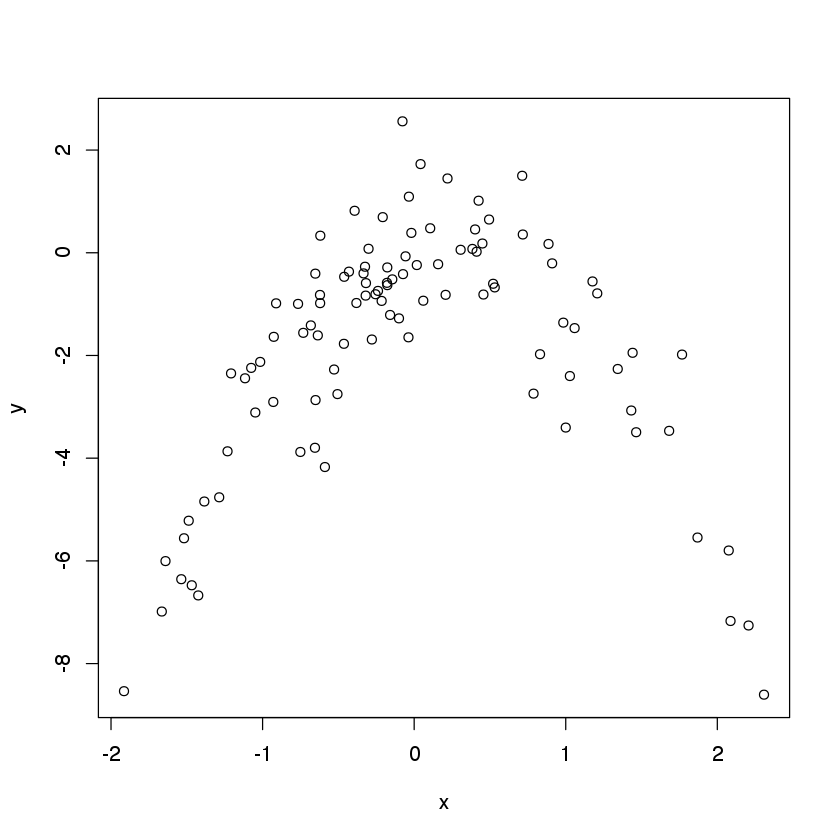

In [55]:
set.seed(1)
y = rnorm(100)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)
plot(x, y)

In [56]:
library(boot)
set.seed(1)
data=data.frame(x,y)
glm.fit=glm(y~x,data=data)
cv.glm(data,glm.fit)$delta

[1] 5.890979 5.888812

In [57]:
glm.fit=glm(y~poly(x,2),data=data)
cv.glm(data,glm.fit)$delta

[1] 1.086596 1.086326

In [58]:
glm.fit=glm(y~poly(x,3),data=data)
cv.glm(data,glm.fit)$delta

[1] 1.102585 1.102227

In [59]:
glm.fit=glm(y~poly(x,4),data=data)
cv.glm(data,glm.fit)$delta

[1] 1.114772 1.114334

##Problem9

In [60]:
library(MASS)
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [61]:
set.seed(1)
attach(Boston)

In [63]:
sd(medv)/sqrt(nrow(Boston))

[1] 0.4088611

In [65]:
boot.fn=function(data,index) return(mean(data[index]))
res=boot(medv,boot.fn,1000)
res


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original    bias    std. error
t1* 22.53281 0.0027583   0.4120131

In [66]:
t.test(medv)


	One Sample t-test

data:  medv
t = 55.1111, df = 505, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72953 23.33608
sample estimates:
mean of x 
 22.53281 


In [69]:
median(medv)

[1] 21.2

In [70]:
boot.fn=function(data,index) return(median(data[index]))
boot(medv,boot.fn,1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*     21.2 -0.0025    0.374358

In [71]:
quantile(medv,0.1)

10% 
12.75

In [72]:
boot.fn=function(data,index) return(quantile(data[index],0.1))
boot(medv,boot.fn,1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75  0.0261   0.4912231